Connexion au Drive et Installation

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

!pip install ultralytics roboflow

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 139.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.13.0.92
    Uninstalling opencv-python-headless-4.13.0.92:
      Successfully uninstalled opencv-python-headless-4.13.0.92
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


Téléchargement automatique des images

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RoIkgBoeVz4tYGalcWNf")
project = rf.workspace("jeannot").project("mangrove-detection-yolo")
version = project.version(2)
dataset = version.download("yolov8")


# On affiche le chemin pour être sûr
print("Tes images sont ici :", dataset.location)

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Mangrove-Detection-YOLO-2 in yolov8:: 100%|██████████| 1396/1396 [00:00<00:00, 7606.80it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Tes images sont ici : /content/Mangrove-Detection-YOLO-2


Entraînement sécurisé sur Drive

In [3]:
from ultralytics import YOLO

# On charge ton fichier .pt que tu viens d'uploader
model = YOLO('/content/yolov8s.pt')

# On lance la machine
model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=50,
    imgsz=640,
    project='/content/Mangrove-Detection-YOLO-2',
    name='resultats_v1'
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Mangrove-Detection-YOLO-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=resultats_v1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f28fea212b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Générer et Afficher les Graphes

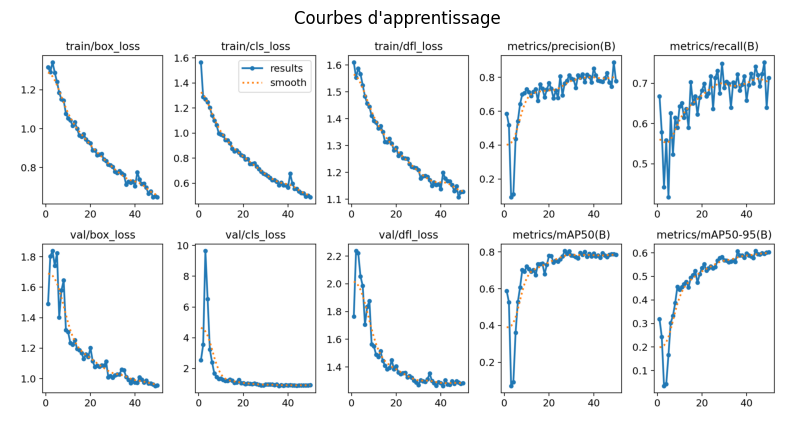

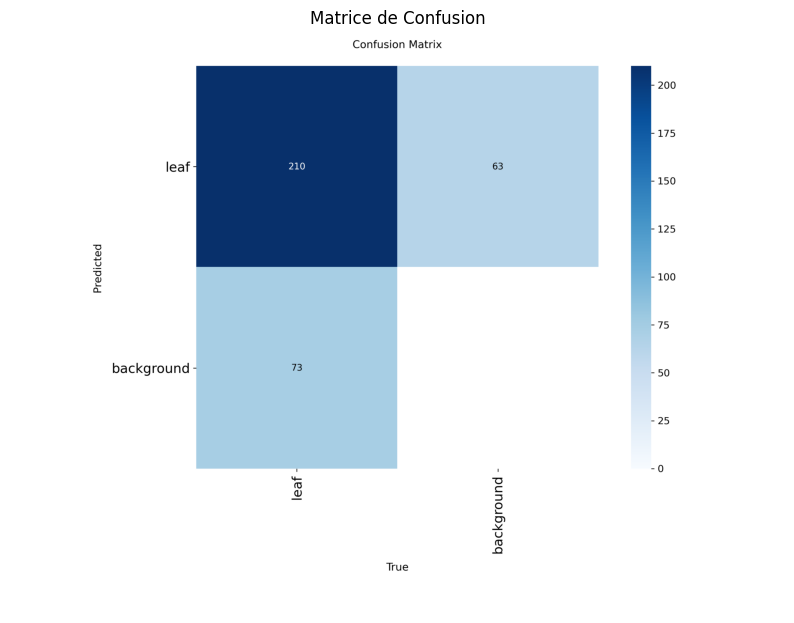

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Chemin vers tes résultats sur le Drive
path = '/content/Mangrove-Detection-YOLO-2/resultats_v1/'
# 1. Courbes d'apprentissage (Loss, mAP)
plt.figure(figsize=(10,10))
plt.imshow(mpimg.imread(path + 'results.png'))
plt.axis('off')
plt.title("Courbes d'apprentissage")
plt.show()

# 2. Matrice de Confusion (Pour voir les erreurs)
plt.figure(figsize=(10,10))
plt.imshow(mpimg.imread(path + 'confusion_matrix.png'))
plt.axis('off')
plt.title("Matrice de Confusion")
plt.show()

Le Test Final

In [7]:
# Charger le MEILLEUR modèle sauvegardé
best_model = YOLO('/content/Mangrove-Detection-YOLO-2/resultats_v1/weights/best.pt')

# Lancer le test sur les images de test
metrics = best_model.val(split='test')

print(f"Précision sur le dossier Test (mAP50): {metrics.box.map50}")

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1472.1±499.6 MB/s, size: 72.7 KB)
val: Scanning /content/Mangrove-Detection-YOLO-2/test/labels... 28 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 28/28 2.2Kit/s 0.0s
val: New cache created: /content/Mangrove-Detection-YOLO-2/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 2.1it/s 1.0s
                   all         28        154      0.832      0.708      0.794      0.597
Speed: 4.9ms preprocess, 14.1ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to /content/runs/detect/val
Précision sur le dossier Test (mAP50): 0.7939182232760003


Visualiser des prédictions réelles

In [8]:
# Faire une prédiction sur les images de test
results = best_model.predict(source=f"{dataset.location}/test/images", save=True, conf=0.5)

# Afficher une des images prédites
import glob
prediction_images = glob.glob('/content/Mangrove-Detection-YOLO-2/resultats_v1/predict/*.jpg')
if prediction_images:
    plt.imshow(mpimg.imread(prediction_images[0]))
    plt.axis('off')
    plt.show()


image 1/28 /content/Mangrove-Detection-YOLO-2/test/images/avicennia_officinalis13_JPG.rf.a2181e6ec7a3f8023814f7d731099a20.jpg: 640x640 1 leaf, 16.2ms
image 2/28 /content/Mangrove-Detection-YOLO-2/test/images/avicennia_officinalis32_JPG.rf.9b2df196058e3b372017664760436e4b.jpg: 640x640 1 leaf, 16.2ms
image 3/28 /content/Mangrove-Detection-YOLO-2/test/images/avicennia_officinalis63_JPG.rf.e04118572e057613356653aabbceaba4.jpg: 640x640 1 leaf, 16.1ms
image 4/28 /content/Mangrove-Detection-YOLO-2/test/images/avicennia_officinalis74_jpg.rf.2686ccbe2e5e044256532e44bf505798.jpg: 640x640 2 leafs, 16.1ms
image 5/28 /content/Mangrove-Detection-YOLO-2/test/images/avicennia_officinalis84_jpg.rf.a1a3aafdde4679ff1d53659c184880b0.jpg: 640x640 3 leafs, 16.1ms
image 6/28 /content/Mangrove-Detection-YOLO-2/test/images/avicennia_officinalis93_jpg.rf.3368323d628548f90ded6a0951ab86b4.jpg: 640x640 2 leafs, 16.1ms
image 7/28 /content/Mangrove-Detection-YOLO-2/test/images/rhizophora_apiculata31_JPG.rf.561bb592